# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="./sample_data/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

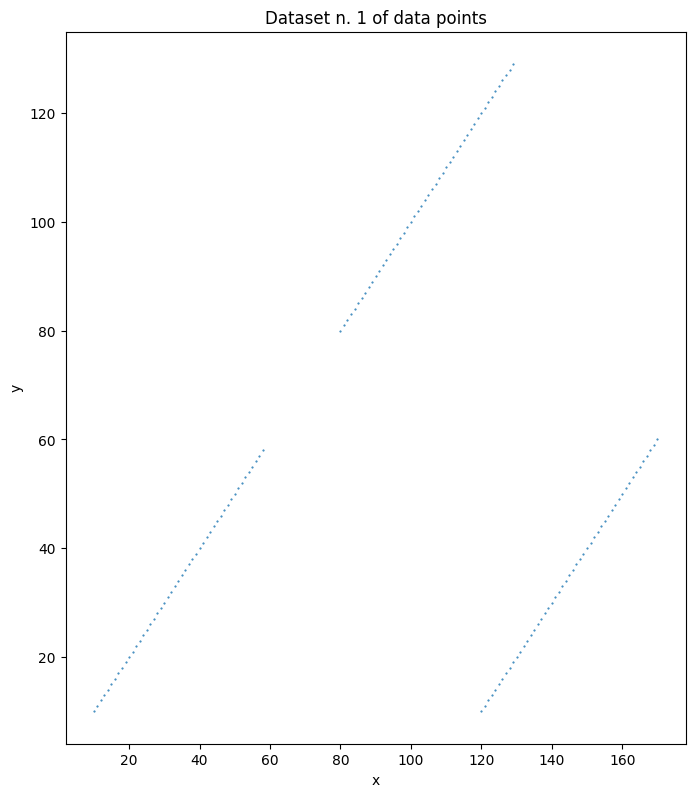

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

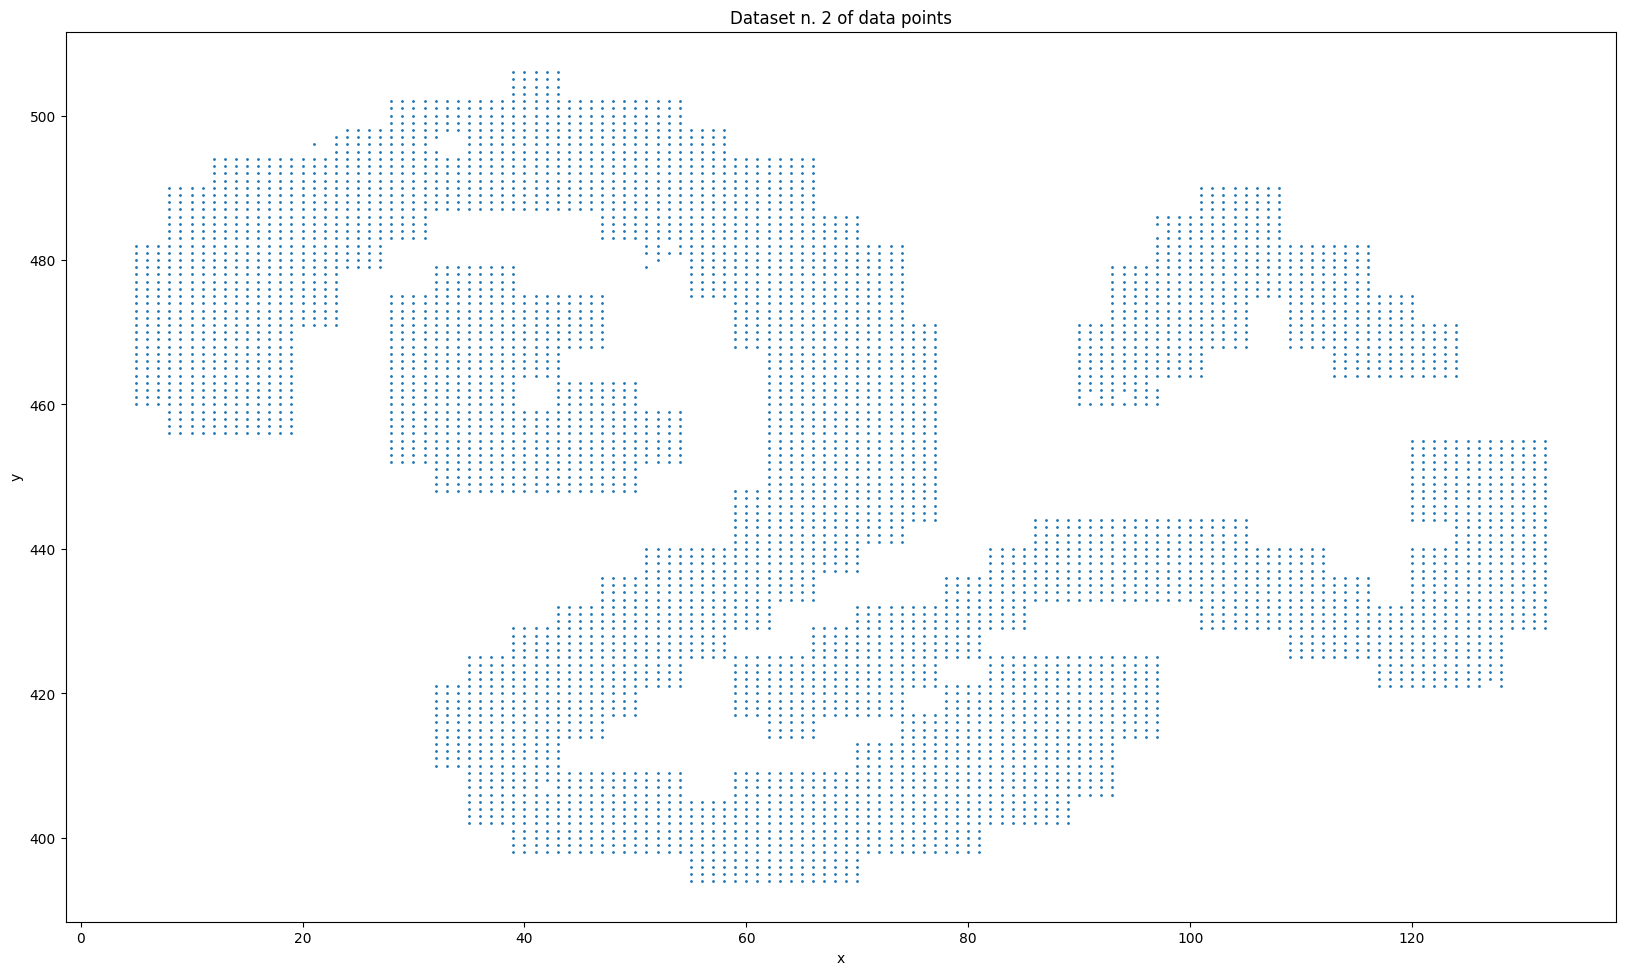

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

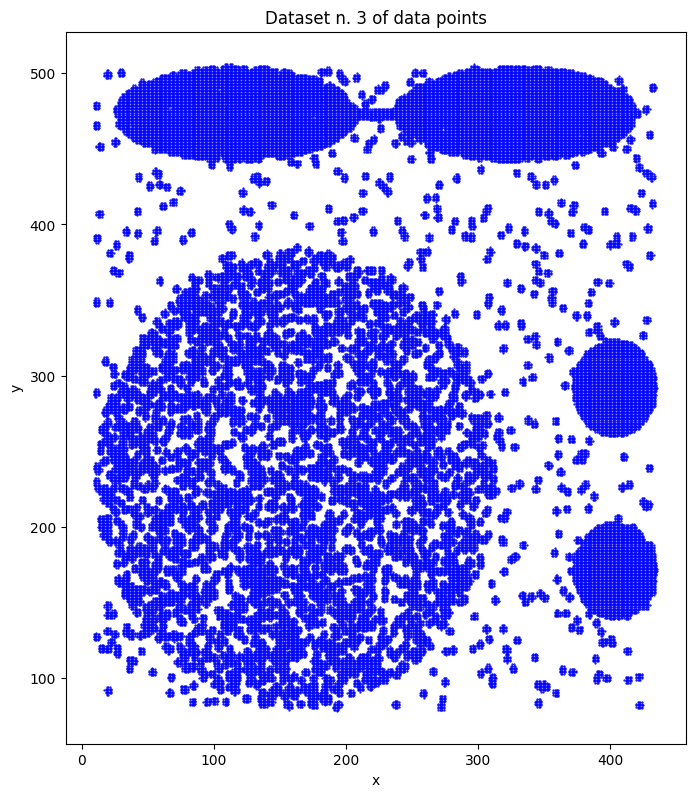

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=1.2, markeredgecolor = 'blue')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./sample_data/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
for i in range(n_samples1):
    print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    print("in cluster n."+str(kmeans1.labels_[i]))

c:\Users\harbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Example n.0=(10.0,10.0)
in cluster n.0
Example n.1=(11.0,11.0)
in cluster n.0
Example n.2=(12.0,12.0)
in cluster n.0
Example n.3=(13.0,13.0)
in cluster n.0
Example n.4=(14.0,14.0)
in cluster n.0
Example n.5=(15.0,15.0)
in cluster n.0
Example n.6=(16.0,16.0)
in cluster n.0
Example n.7=(17.0,17.0)
in cluster n.0
Example n.8=(18.0,18.0)
in cluster n.0
Example n.9=(19.0,19.0)
in cluster n.0
Example n.10=(20.0,20.0)
in cluster n.0
Example n.11=(21.0,21.0)
in cluster n.0
Example n.12=(22.0,22.0)
in cluster n.0
Example n.13=(23.0,23.0)
in cluster n.0
Example n.14=(24.0,24.0)
in cluster n.0
Example n.15=(25.0,25.0)
in cluster n.0
Example n.16=(26.0,26.0)
in cluster n.0
Example n.17=(27.0,27.0)
in cluster n.0
Example n.18=(28.0,28.0)
in cluster n.0
Example n.19=(29.0,29.0)
in cluster n.0
Example n.20=(30.0,30.0)
in cluster n.0
Example n.21=(31.0,31.0)
in cluster n.0
Example n.22=(32.0,32.0)
in cluster n.0
Example n.23=(33.0,33.0)
in cluster n.0
Example n.24=(34.0,34.0)
in cluster n.0
Example n.

In the following program we plot the clusters

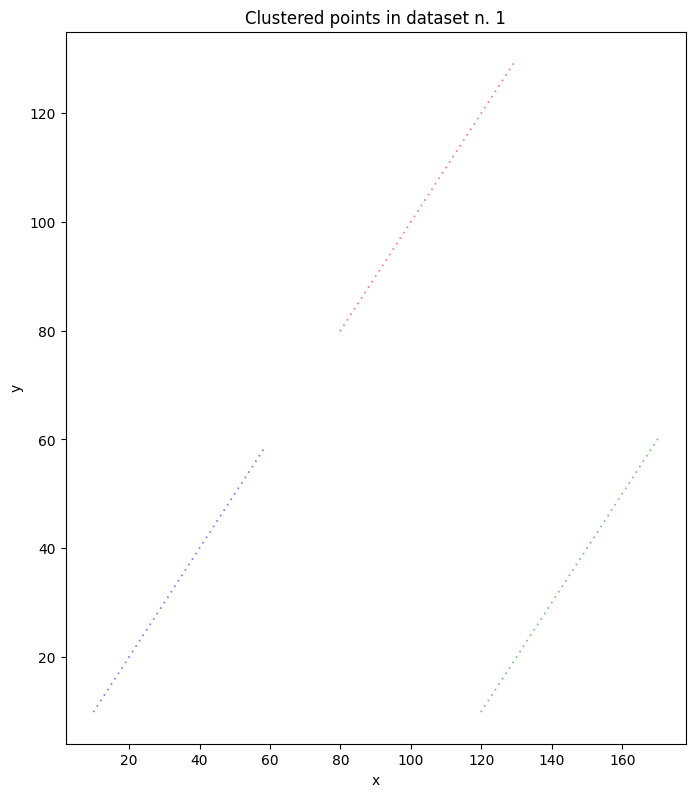

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on dataset2.

In [7]:
import csv
import sys
from os.path import join
from Utils import *
import numpy as np
 

file_path="./sample_data/"
file_name2="dataset-DBSCAN.csv"     

data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

from sklearn.cluster import KMeans

np.random.seed(5)

k=4
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

i=0
# for i in range(n_samples1):
#     print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
#     print("in cluster n."+str(kmeans1.labels_[i]))



c:\Users\harbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

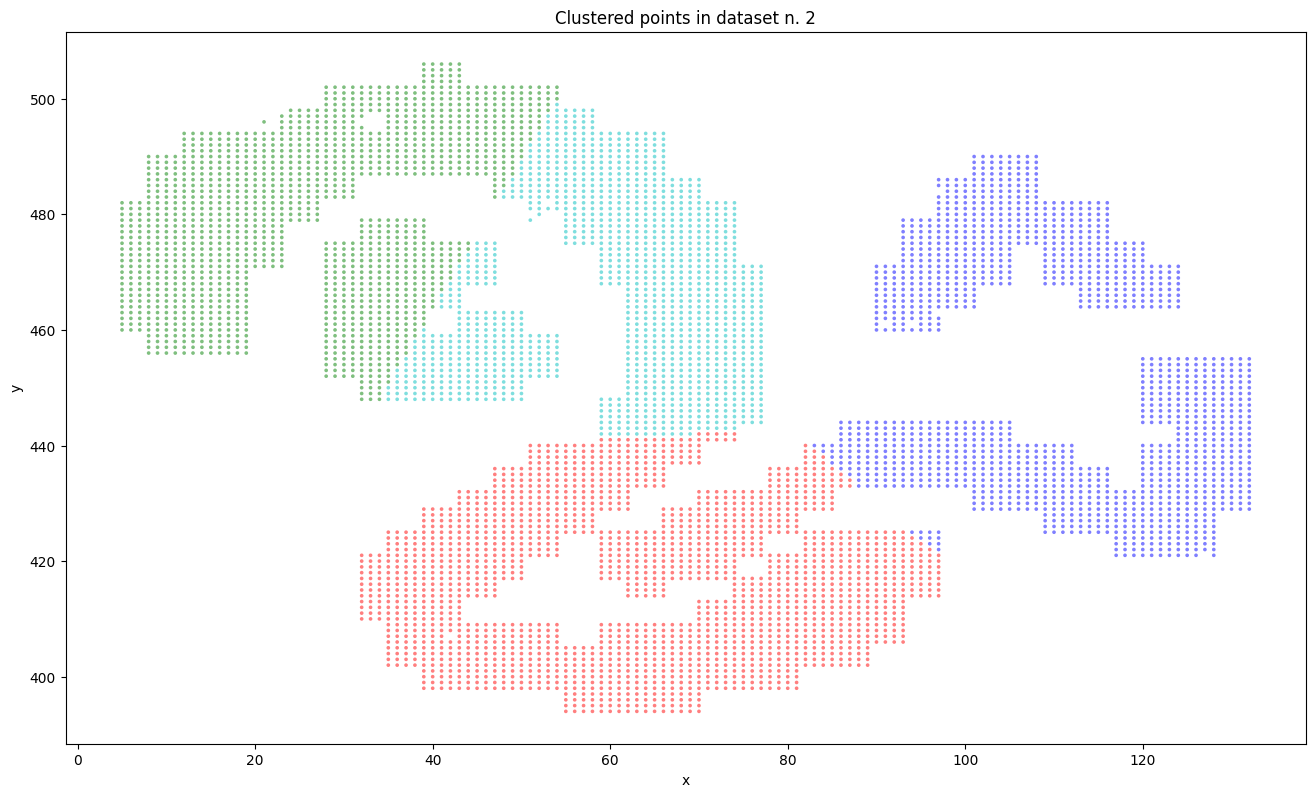

In [8]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=7, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [9]:
import csv
import sys
from os.path import join
from Utils import *
import numpy as np
 

file_path="./sample_data/"
file_name3="CURE-complete.csv"     

data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)

i=0
# for i in range(n_samples1):
#     print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
#     print("in cluster n."+str(kmeans1.labels_[i]))


c:\Users\harbi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

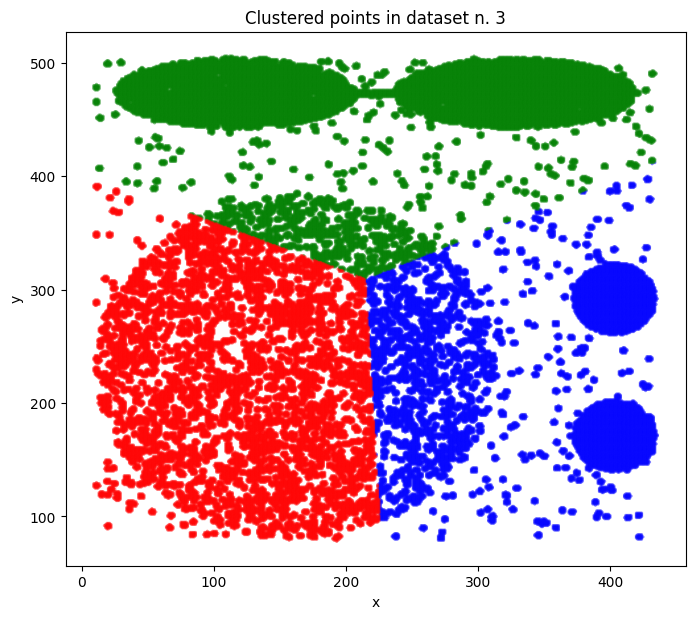

In [10]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']

#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=5, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [17]:
from sklearn.metrics import calinski_harabasz_score
from Utils import get_best_shilouette
from sklearn.model_selection import train_test_split

k= 4

n_iterations = 10 
best_kmeans = None
best_silhouette_score = -1 

file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv" 

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

data3 = data3[::10]




# kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)
# kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
# kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)


# Calcola l'indice di Silhouette per il dataset 1
silhouette_score_1 = get_best_shilouette(n_iterations, k , data1)
print(f"Silhouette Score for Dataset 1: {silhouette_score_1:.2f}")

silhouette_score_2 = get_best_shilouette(n_iterations, k , data2)
print(f"Silhouette Score for Dataset 2: {silhouette_score_2:.2f}")

silhouette_score_3 = get_best_shilouette(n_iterations, k , data3)
print(f"Silhouette Score for Dataset 3: {silhouette_score_3:.2f}")

# ch_score = calinski_harabasz_score(data1, kmeans1.labels_)
# print(f"Calinski-Harabasz Score 1: {ch_score:.2f}")
# ch_score = calinski_harabasz_score(data2, kmeans2.labels_)
# print(f"Calinski-Harabasz Score 2: {ch_score:.2f}")
# ch_score = calinski_harabasz_score(data3, kmeans3.labels_)
# print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Silhouette Score for Dataset 1: 0.68
Silhouette Score for Dataset 2: 0.42
Silhouette Score for Dataset 3: 0.41


As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

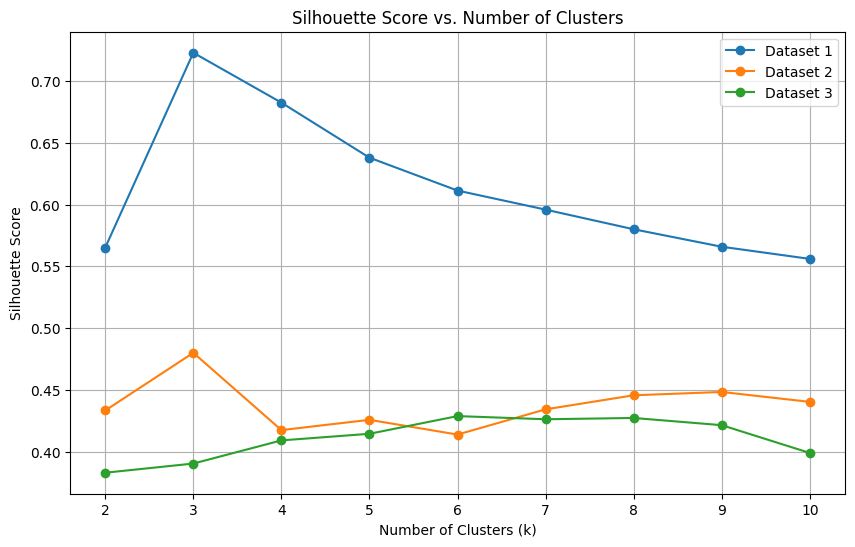

In [18]:
import matplotlib.pyplot as plt

# Range di valori di k da esaminare
k_values = range(2, 11)  # Ad esempio, da 2 a 10 cluster

# Liste per memorizzare i punteggi di Silhouette per ciascun k
silhouette_scores_1 = []
silhouette_scores_2 = []
silhouette_scores_3 = []

for k in k_values:
    silhouette_score_1 = get_best_shilouette(n_iterations, k, data1)
    silhouette_score_2 = get_best_shilouette(n_iterations, k, data2)
    silhouette_score_3 = get_best_shilouette(n_iterations, k, data3)

    
    # Aggiungi i punteggi alla lista
    silhouette_scores_1.append(silhouette_score_1)
    silhouette_scores_2.append(silhouette_score_2)
    silhouette_scores_3.append(silhouette_score_3)


# Traccia i punteggi di Silhouette rispetto ai valori di k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores_1, marker='o', label='Dataset 1')
plt.plot(k_values, silhouette_scores_2, marker='o', label='Dataset 2')
plt.plot(k_values, silhouette_scores_3, marker='o', label='Dataset 3')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

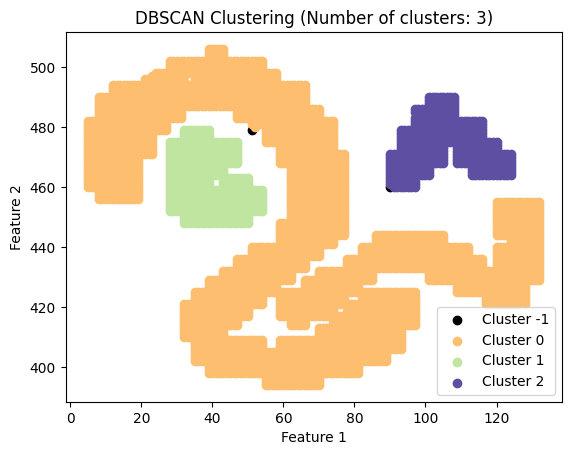

In [37]:

from sklearn.cluster import DBSCAN

# Crea un'istanza del modello DBSCAN
dbscan = DBSCAN(eps=2, min_samples=10)  # Imposta i parametri eps e min_samples secondo le tue esigenze

# Esegui il clustering con DBSCAN
labels = dbscan.fit_predict(data2)

unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)  # Calcola il numero di cluster (ignorando il rumore)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'  # Punti rumorosi in nero
    cluster_points = data2[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f'Cluster {label}')

plt.title(f'DBSCAN Clustering (Number of clusters: {n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

[[0.         1.         1.         ... 2.23606798 2.82842712 3.        ]
 [0.         1.         1.         ... 2.         2.23606798 2.23606798]
 [0.         1.         1.         ... 2.         2.         2.23606798]
 ...
 [0.         1.         1.         ... 2.         2.         2.23606798]
 [0.         1.         1.         ... 2.         2.23606798 2.23606798]
 [0.         1.         1.         ... 2.23606798 2.82842712 3.        ]]


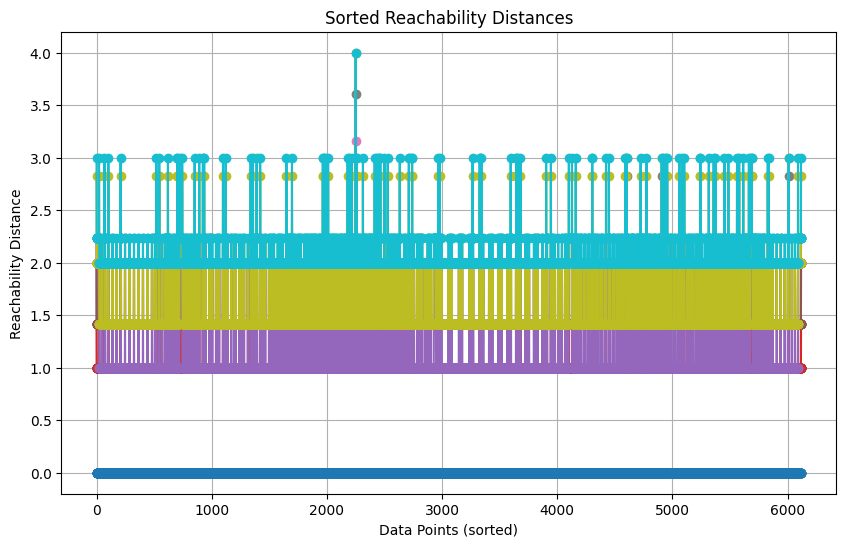

IndexError: index 36834 is out of bounds for axis 0 with size 6118

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Minpts = 10

# Calcola la distanza di raggiungibilità del 10-esimo vicino per ciascun punto dati
neighbors = NearestNeighbors(n_neighbors=Minpts)
neighbors.fit(data2)
distances, _ = neighbors.kneighbors(data2)
reachability_distances = np.mean(distances[:, -1], axis=0)
print(distances)
# Ordina le distanze di raggiungibilità in modo crescente
sorted_reachability_distances = np.sort(distances)

# Plotta le distanze di raggiungibilità ordinate
plt.figure(figsize=(10, 6))
plt.plot(sorted_reachability_distances, marker='o', linestyle='-')
plt.title('Sorted Reachability Distances')
plt.xlabel('Data Points (sorted)')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

# Trova il gomito del diagramma per ottenere il valore di eps
# Puoi farlo manualmente osservando il grafico o utilizzare un metodo automatico come la derivata seconda
# Ad esempio, trova il punto in cui la derivata seconda è massima come possibile gomito

# second_derivative = np.diff(np.diff(sorted_reachability_distances))
# elbow_index = np.argmax(second_derivative) + 1
# eps_value = sorted_reachability_distances[elbow_index]

# print(f'Estimated eps value: {eps_value:.2f}')

# # Utilizza DBSCAN con i parametri ottimizzati
# dbscan = DBSCAN(eps=eps_value, min_samples=Minpts)
# cluster_labels = dbscan.fit_predict(data)

# Ora puoi utilizzare 'cluster_labels' per analizzare i cluster identificati
